<div style="background-color:#e6f0ff; padding:15px; border-radius:10px; font-size:16px">

 ## Exercise 1 – Linear Regression from Scratch with NumPy | ML Basics

</div>


## Objective
Learn how to implement Linear Regression without using machine learning libraries like scikit-learn. This helps build a deeper understanding of how linear models work under the hood.

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Generate Synthetic Dataset

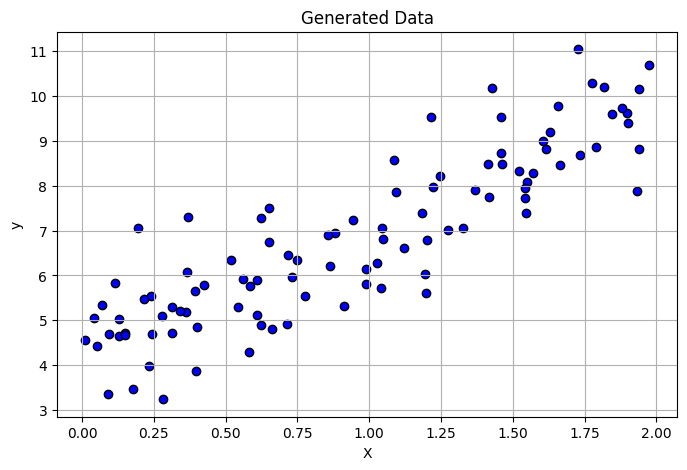

In [2]:
# Set seed for reproducibility
np.random.seed(42)

# Generate X and y
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Visualize
plt.figure(figsize=(8,5))
plt.scatter(X, y, c='blue', edgecolors='k')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Generated Data")
plt.grid(True)
plt.show()

## Step 2: Add Bias Term (X0 = 1)

In [3]:
X_b = np.c_[np.ones((100, 1)), X]  # Add x0 = 1 to each instance

## Step 3: Initialize Parameters

In [4]:
theta = np.random.randn(2, 1)  # Random initial values

## Step 4: Define the Cost Function

In [5]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

## Step 5: Gradient Descent Algorithm

In [6]:
def gradient_descent(X, y, theta, learning_rate=0.1, iterations=1000):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
        cost_history.append(compute_cost(X, y, theta))
    
    return theta, cost_history

## Step 6: Train the Model

In [7]:
final_theta, cost_history = gradient_descent(X_b, y, theta, learning_rate=0.1, iterations=1000)
print("Final Parameters (Theta):", final_theta.ravel())

Final Parameters (Theta): [4.21509609 2.77011344]


## Step 7: Plot the Cost Over Iterations

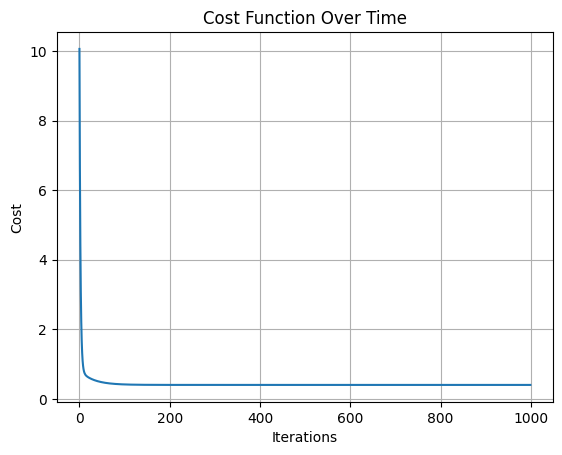

In [8]:
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Over Time")
plt.grid(True)
plt.show()

## Step 8: Plot Best Fit Line

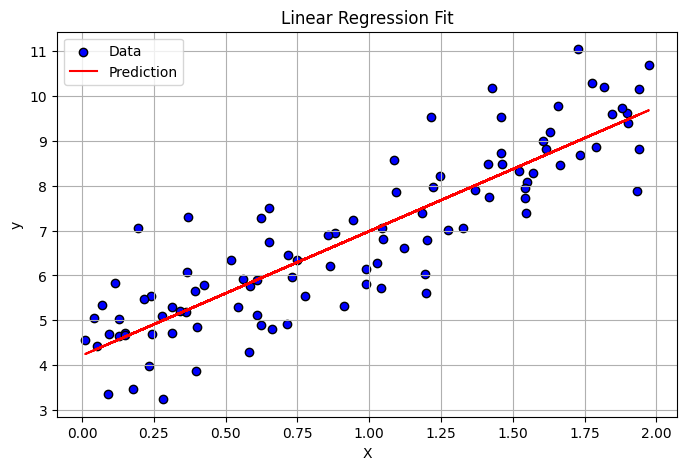

In [9]:
plt.figure(figsize=(8,5))
plt.scatter(X, y, c='blue', edgecolors='k', label="Data")
plt.plot(X, X_b.dot(final_theta), c='red', label="Prediction")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.grid(True)
plt.show()